<a href="https://colab.research.google.com/github/hrishavranjan/Python-Basic-Collab-Codes/blob/main/LAB_6_AI_24_01_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

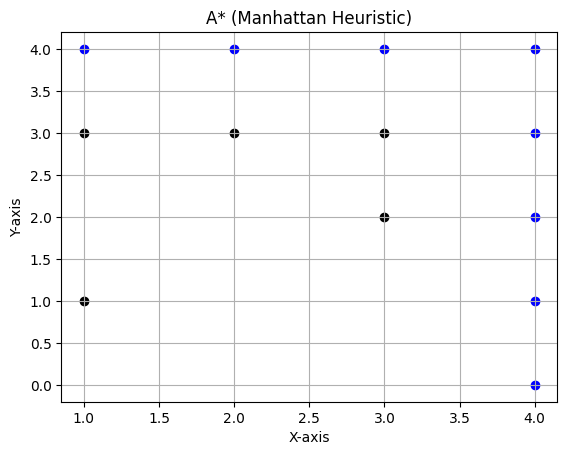

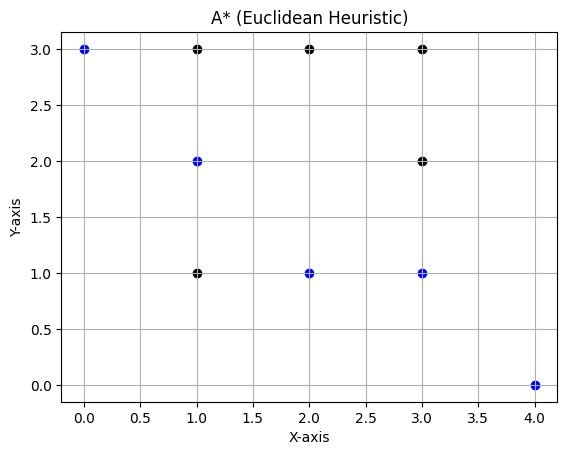

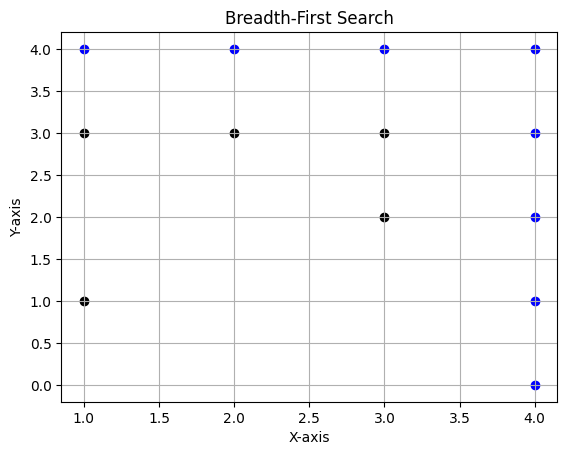

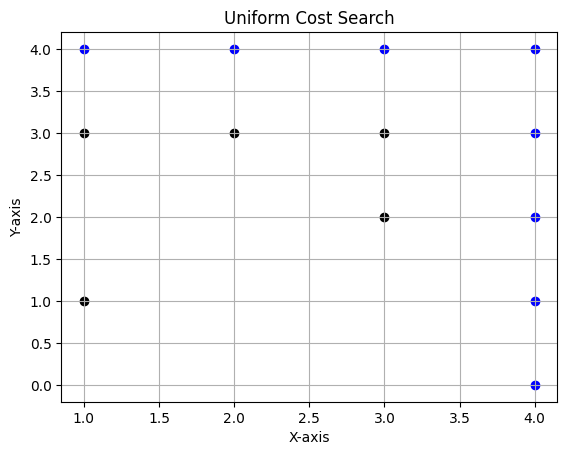

In [1]:
import heapq
import math
import matplotlib.pyplot as plt
from collections import deque

def a_star(grid, start, goal, heuristic):
    rows, cols = len(grid), len(grid[0])
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    g_score = {start: 0}

    def h(pos):
        if heuristic == "manhattan":
            return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])
        elif heuristic == "euclidean":
            return math.sqrt((pos[0] - goal[0]) ** 2 + (pos[1] - goal[1]) ** 2)

    while open_list:
        _, current = heapq.heappop(open_list)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (1, 1), (-1, 1), (1, -1)]:
            if heuristic == "manhattan" and (dx != 0 and dy != 0):
                continue
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor[0]][neighbor[1]] == 0:
                tentative_g_score = g_score[current] + math.sqrt(dx ** 2 + dy ** 2)
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    g_score[neighbor] = tentative_g_score
                    f_score = tentative_g_score + h(neighbor)
                    heapq.heappush(open_list, (f_score, neighbor))
                    came_from[neighbor] = current

    return None

def bfs(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    queue = deque([start])
    came_from = {}
    visited = set()
    visited.add(start)

    while queue:
        current = queue.popleft()
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor[0]][neighbor[1]] == 0 and neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)
                came_from[neighbor] = current

    return None

def uniform_cost_search(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    cost = {start: 0}

    while open_list:
        current_cost, current = heapq.heappop(open_list)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor[0]][neighbor[1]] == 0:
                new_cost = current_cost + 1
                if neighbor not in cost or new_cost < cost[neighbor]:
                    cost[neighbor] = new_cost
                    heapq.heappush(open_list, (new_cost, neighbor))
                    came_from[neighbor] = current

    return None

def plot_path(grid, path, title):
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 1:
                plt.scatter(j, len(grid) - i - 1, color="black")

    if path:
        for pos in path:
            plt.scatter(pos[1], len(grid) - pos[0] - 1, color="blue")

    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid()
    plt.show()

# Example usage
grid = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0]
]
start = (0, 0)
goal = (4, 4)

# A* with Manhattan heuristic
path_a_star_manhattan = a_star(grid, start, goal, "manhattan")
plot_path(grid, path_a_star_manhattan, "A* (Manhattan Heuristic)")

# A* with Euclidean heuristic
path_a_star_euclidean = a_star(grid, start, goal, "euclidean")
plot_path(grid, path_a_star_euclidean, "A* (Euclidean Heuristic)")

# BFS
path_bfs = bfs(grid, start, goal)
plot_path(grid, path_bfs, "Breadth-First Search")

# Uniform Cost Search
path_ucs = uniform_cost_search(grid, start, goal)
plot_path(grid, path_ucs, "Uniform Cost Search")
